   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

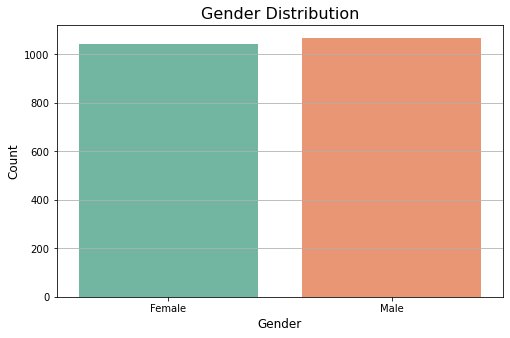

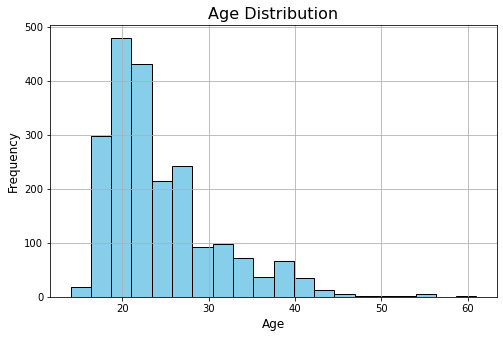

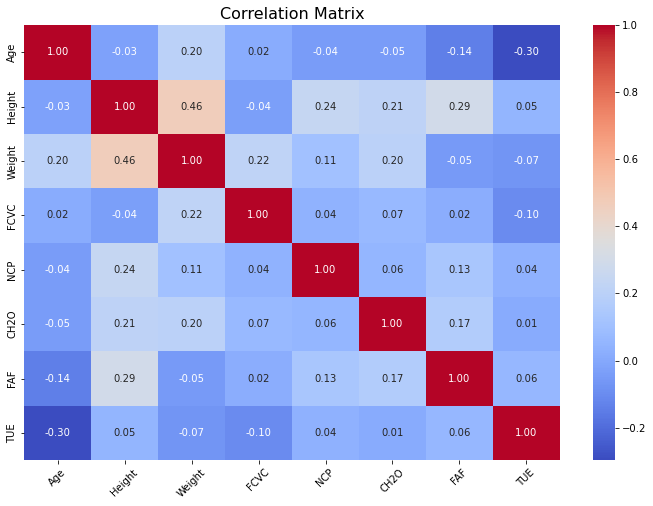

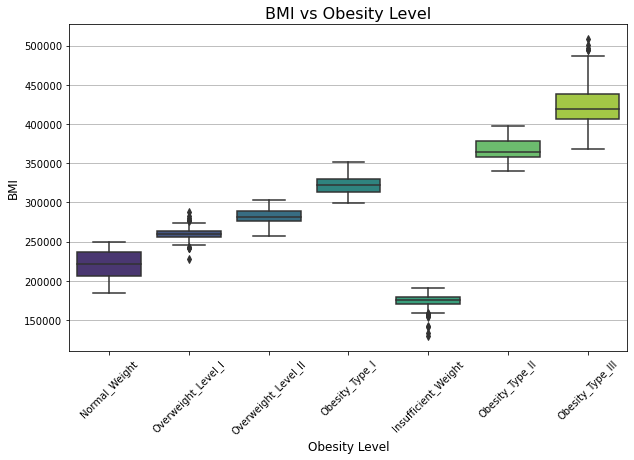

C:\Users\arali\AppData\Local\Temp/ipykernel_17504/3371231679.py:79: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(save_path + 'vegetable_vs_obesity.png', dpi=300, bbox_inches='tight')
C:\Users\arali\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


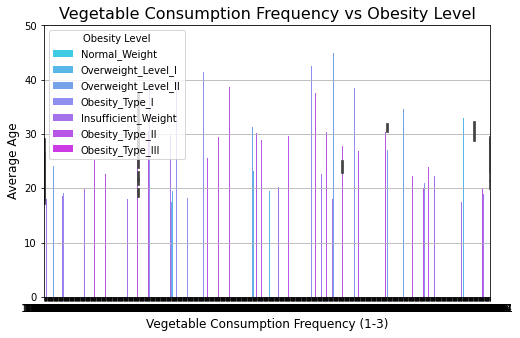

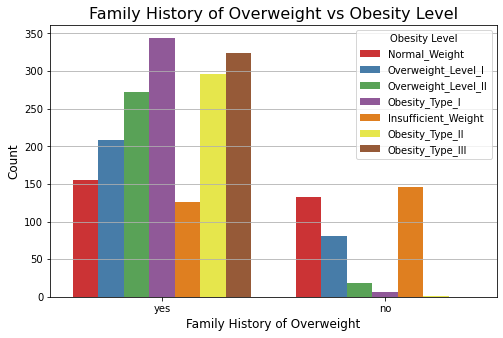

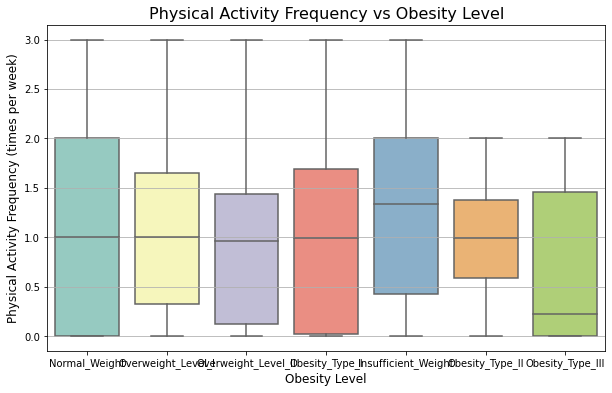

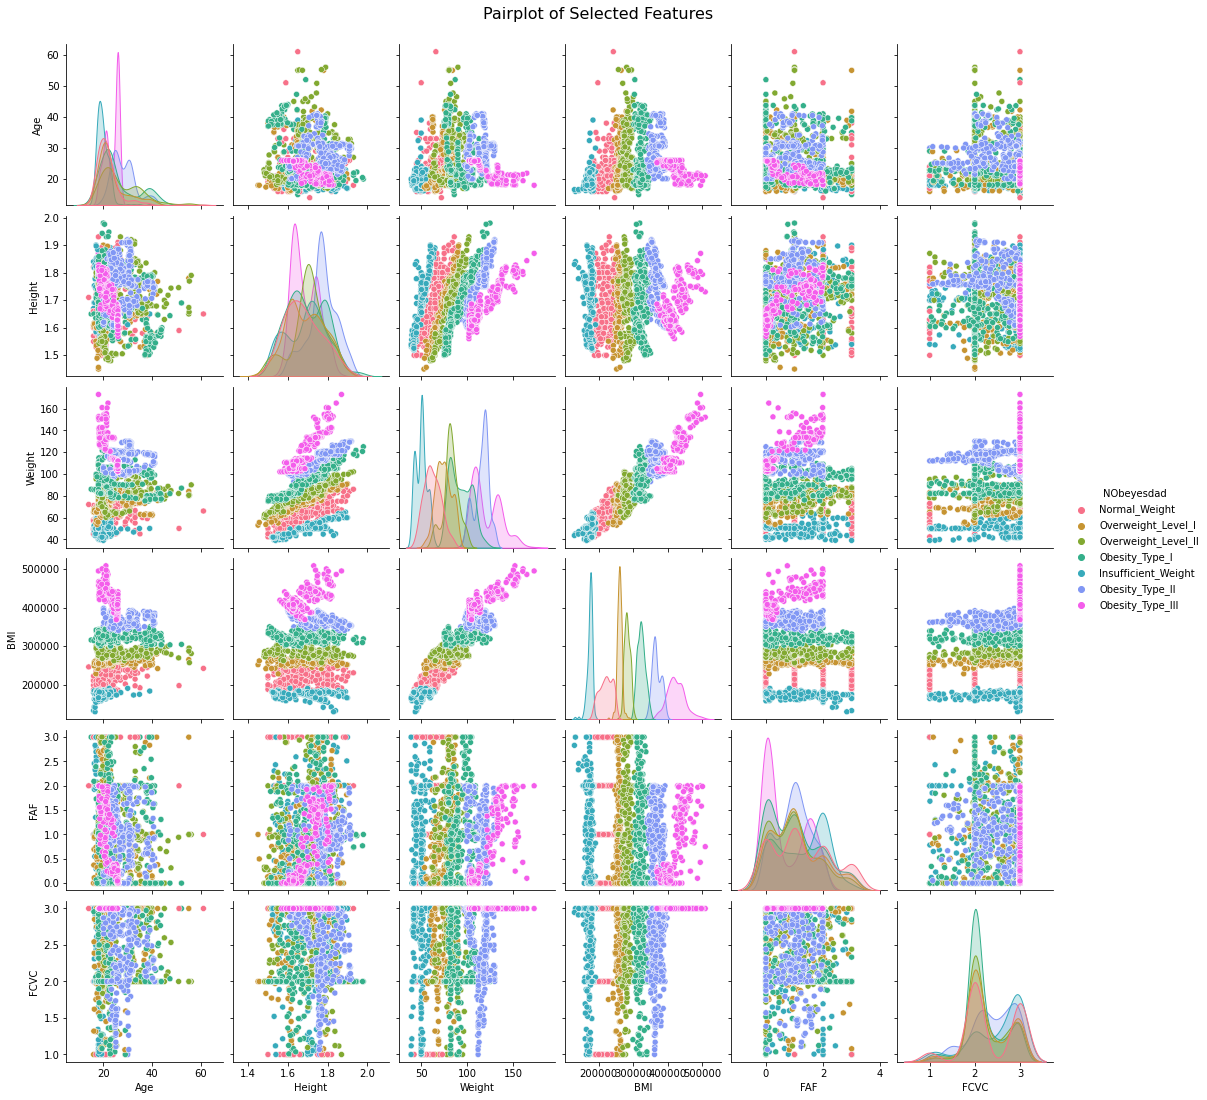

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\arali\Desktop\ObesityDataSet_raw_and_data_sinthetic.csv")

save_path = r'C:\Users\arali\Desktop\\'
# Display the first few rows
print(df.head())

# Display basic info about the dataset
print(df.info())

# Get summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())
# Drop any rows with missing values (if applicable)
df.dropna(inplace=True)

# a) Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.savefig(save_path + 'gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# b) Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig(save_path + 'age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# c) Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.savefig(save_path + 'correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# d) BMI vs. Obesity Level
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)  # Calculate BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=df, palette='viridis')
plt.title('BMI vs Obesity Level', fontsize=16)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.savefig(save_path + 'bmi_vs_obesity.png', dpi=300, bbox_inches='tight')
plt.show()

# e) Vegetable Consumption vs. Obesity Level
plt.figure(figsize=(8, 5))
sns.barplot(x='FCVC', y='Age', hue='NObeyesdad', data=df, palette='cool')
plt.title('Vegetable Consumption Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Vegetable Consumption Frequency (1-3)', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.legend(title='Obesity Level', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.savefig(save_path + 'vegetable_vs_obesity.png', dpi=300, bbox_inches='tight')
plt.show()

# f) Family History of Overweight vs. Obesity Level
plt.figure(figsize=(8, 5))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df, palette='Set1')
plt.title('Family History of Overweight vs Obesity Level', fontsize=16)
plt.xlabel('Family History of Overweight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Obesity Level', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.savefig(save_path + 'family_history_vs_obesity.png', dpi=300, bbox_inches='tight')
plt.show()

# g) Physical Activity Frequency vs. Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='FAF', data=df, palette='Set3')
plt.title('Physical Activity Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Physical Activity Frequency (times per week)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.savefig(save_path + 'physical_activity_vs_obesity.png', dpi=300, bbox_inches='tight')
plt.show()

# h) Pairplot Analysis
subset = df[['Age', 'Height', 'Weight', 'BMI', 'FAF', 'FCVC', 'NObeyesdad']]
sns.pairplot(subset, hue='NObeyesdad', palette='husl')
plt.suptitle('Pairplot of Selected Features', fontsize=16, y=1.02)
plt.savefig(save_path + 'pairplot_analysis.png', dpi=300, bbox_inches='tight')
plt.show()